<a href="https://colab.research.google.com/github/nancy280/Next_Gen_Dev/blob/TASK-4/TASK_4_Spam_Sms_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

In [ ]:
!pip install chardet

In [ ]:
import chardet

with open("./spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

data = pd.read_csv("./spam.csv", encoding=encoding)
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data=data.iloc[:,[0,1]]

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.rename(columns ={"v1":"output","v2":"sms"},inplace=True)

<ipython-input-10-99647fc9065b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns ={"v1":"output","v2":"sms"},inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()
data["output"]=lb.fit_transform(data['output'])
data.head(3)

,output,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
lb.classes_

array(['ham', 'spam'], dtype=object)

In [ ]:
data.duplicated().sum()

403

In [ ]:
data.drop_duplicates(keep="first",inplace=True)
data.shape

(5169, 2)

In [ ]:
data['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

In [ ]:
import regex

In [ ]:
data['num_characters']=data['sms'].apply(len)

In [ ]:
data.head(2)

,output,sms,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['num_of_words']=data.apply(lambda row: len(nltk.word_tokenize(row['sms'])), axis=1)
data.head(2)

,output,sms,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [ ]:
data['num_of_sentences']=data.apply(lambda row: len(nltk.sent_tokenize(row['sms'])), axis=1)
data.head(2)

,output,sms,num_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [ ]:
data[['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
(data[data['output']==0][['num_characters','num_of_words','num_of_sentences']]).describe()

,num_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
(data[data['output']==1][['num_characters','num_of_words','num_of_sentences']]).describe()

,num_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

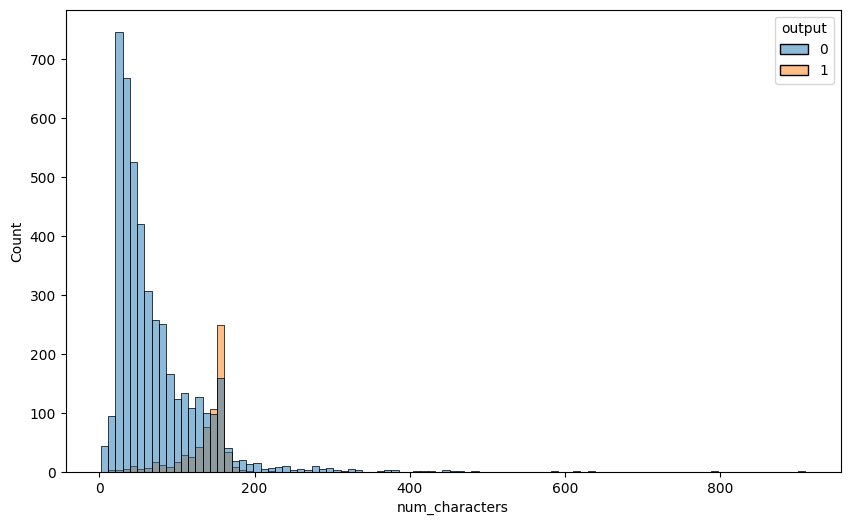

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='num_characters',hue='output')
plt.plot()

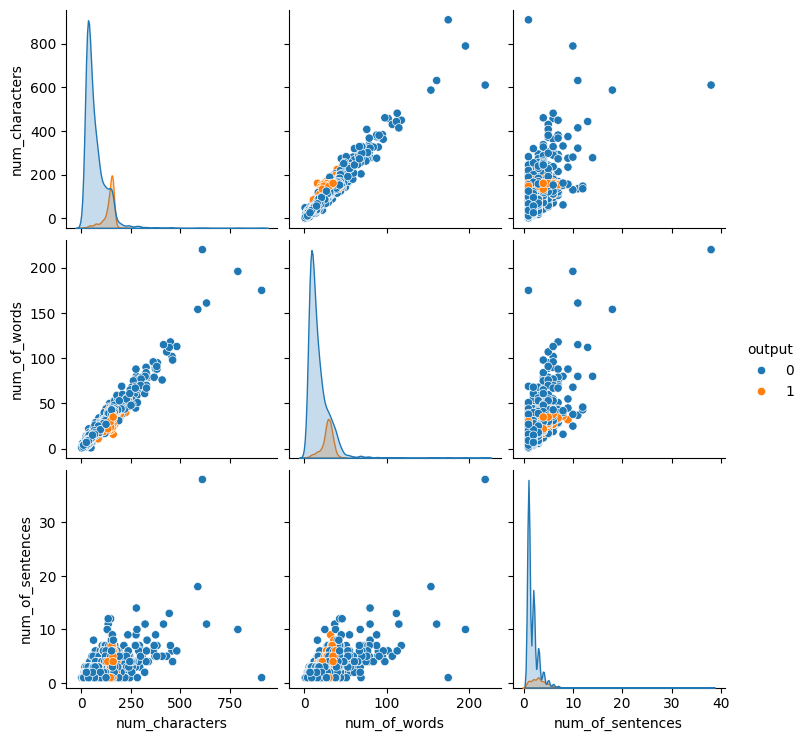

In [ ]:
sns.pairplot(data,hue="output")

In [ ]:
def lower_text(x):
  return x.lower()

In [ ]:
data['sms']=data['sms'].apply(lower_text)

In [ ]:
pattern = r'[^a-zA-Z0-9\s]'
data['sms'] = data['sms'].str.replace(pattern, '', regex=True)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords(x):
  tex=[]
  for i in x.split(' '):
      if(i not in stopwords.words('english')):
        tex.append(i)
  return tex

In [ ]:
data['transformed_txt']=data['sms'].apply(remove_stopwords)

In [ ]:
data.head()

,output,sms,num_characters,num_of_words,num_of_sentences,transformed_txt
0,0,go until jurong point crazy available only in ...,111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,ok lar joking wif u oni,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,u dun say so early hor u c already then say,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,"[nah, dont, think, goes, usf, lives, around, t..."


In [ ]:

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(x):
  text=[]
  for i in x:
    text.append(lemmatizer.lemmatize(i))
  return text
data['transformed_txt']=data['transformed_txt'].apply(lemmatize)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps=PorterStemmer()

In [ ]:
def stemming(x):
  tex=[]
  for i in x:
      tex.append(ps.stem(i))
  return " ".join(tex)

In [ ]:
data['transformed_txt']=data['transformed_txt'].apply(stemming)

In [ ]:
data.head()

,output,sms,num_characters,num_of_words,num_of_sentences,transformed_txt
0,0,go until jurong point crazy available only in ...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor u c already then say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,nah dont think go usf life around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()

In [ ]:
x=cv.fit_transform(data['transformed_txt']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=data['output']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: output, Length: 5169, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y)

In [ ]:
X_train.shape

(3876, 7961)

In [ ]:
Y_train.shape

(3876,)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
gnb=GaussianNB()
bnb=BernoulliNB()
log_model=LogisticRegression()
svm_model=SVC()

In [ ]:

from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[('gnb', gnb), ('bnb', bnb), ('log_model', log_model), ('svm_model', svm_model)], voting='hard')
ensemble_model.fit(X_train, Y_train)
ensemble_pred = ensemble_model.predict(X_test)

print("Train Score: ",ensemble_model.score(X_train,Y_train))
print("Test Score: ",accuracy_score(Y_test, ensemble_pred))


Train Score:  0.9938080495356038
Test Score:  0.979891724671307
